<a href="https://colab.research.google.com/github/somsomdah/Kaggle_exercise/blob/master/State_Farm_Distracted_Driver_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c state-farm-distracted-driver-detection

In [ ]:
!unzip state-farm-distracted-driver-detection.zip

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL.Image as Image
import cv2
import os

In [2]:
imlist=pd.read_csv("driver_imgs_list.csv")

In [3]:
imlist

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [4]:
trainX=[]
trainY=[]

In [5]:
for i,dir in enumerate(os.listdir('./imgs/train')):
    count=0
    print(dir)
    for file in os.listdir('./imgs/train/'+dir):
        if count>=500:
            break
        trainY.append(i)
        
        img=cv2.imread('./imgs/train/'+dir+'/'+file)
        img=cv2.resize(img,dsize=(224,224))
        img=img/255.0
        trainX.append(img)
        count+=1

trainX=np.array(trainX)
trainY=np.array(trainY)

c4
c1
c6
c5
c2
c7
c8
c0
c9
c3


In [7]:
print(trainX.shape,trainY.shape)

(4000, 224, 224, 3) (4000,)


In [6]:
from sklearn.model_selection import train_test_split

trainX,valX,trainY,valY=train_test_split(trainX,trainY,test_size=0.2)

In [8]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator() #data augmentation
datagen.fit(trainX)

In [9]:
mobilenetv2=tf.keras.applications.MobileNetV2()
x=mobilenetv2.layers[-2].output
predictions=tf.keras.layers.Dense(10,activation='softmax')(x)
model=tf.keras.Model(inputs=mobilenetv2.input,outputs=predictions)  

for layer in model.layers[:-10]:
    layer.trainable=False
for layer in model.layers[-10:]:
    layer.trainable=True

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy']) #compile model

In [11]:
history=model.fit_generator(datagen.flow(trainX,trainY,batch_size=32), epochs=30,validation_data=(valX,valY))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
125/125 [==============================] - 8s 64ms/step - loss: 0.5393 - accuracy: 0.8303 - val_loss: 4.4253 - val_accuracy: 0.5470
Epoch 2/30
125/125 [==============================] - 7s 54ms/step - loss: 0.0752 - accuracy: 0.9800 - val_loss: 6.5677 - val_accuracy: 0.4530
Epoch 3/30
125/125 [==============================] - 7s 54ms/step - loss: 0.0338 - accuracy: 0.9923 - val_loss: 5.5785 - val_accuracy: 0.4340
Epoch 4/30
125/125 [==============================] - 7s 54ms/step - loss: 0.0167 - accuracy: 0.9962 - val_loss: 6.4277 - val_accuracy: 0.3650
Epoch 5/30
125/125 [==============================] - 7s 54ms/step - loss: 0.0189 - accuracy: 0.9952 - val_loss: 5.5847 - val_accuracy: 0.4630
Epoch 6/30
125/125 [==============================] - 7s 54ms/step - loss: 0.0231 - accuracy: 0.9935 - val_loss: 4.5431 - val_accuracy: 0.4960
Epoch 7/30
125/125 [==============================] - 7s 54ms/step

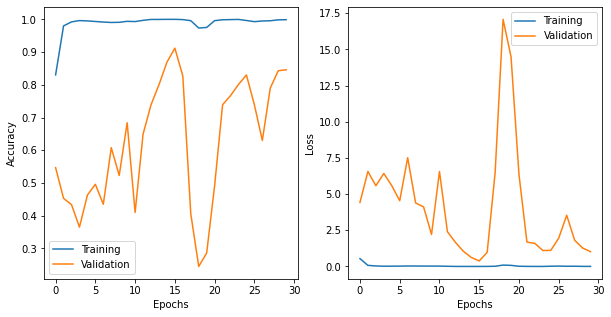

In [12]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(train_acc,label = "Training")
plt.plot(val_acc,label = 'Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label = 'Training')
plt.plot(val_loss,label = 'Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()